![lop](../../images/logo_diive1_128px.png)

# **Heatmap per year and month**

---
**Notebook version**: `3` (4 Jul 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **General usage**

```python
import diive as dv
dv.heatmapyearmonth(...)
```

</br>

# **Description**

- Plots heatmap showing measured values or ranks of values (z) of time series as year vs month.
- Time series must have monthly time resolution.
- This example uses 10 years of air temperature measurements, recorded at half-hourly time resolution that is resampled to monthly time resolution before plotting.
- `.heatmapyearmonth()` is an alias for the class `diive.core.plotting.heatmap_datetime.HeatmapYearMonth`, which is based on class `diive.core.plotting.heatmap_base.HeatmapBase`.

</br>

# **Imports**

In [1]:
import diive as dv
from diive.core.plotting.heatmap_base import HeatmapBase
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.88.0


</br>

# **Docstring**

In [2]:
help(dv.heatmapyearmonth)  # Accepts parameters for HeatmapBase
# help(HeatmapBase)

Help on class HeatmapYearMonth in module diive.core.plotting.heatmap_datetime:

class HeatmapYearMonth(diive.core.plotting.heatmap_base.HeatmapBase)
 |  HeatmapYearMonth(series: pandas.core.series.Series, agg: str = 'mean', ranks: bool = False, cmap: str = None, **kwargs)
 |  
 |  A class for plotting heatmaps of time series data aggregated by year and month.
 |  
 |  This class extends HeatmapBase to visualize monthly aggregated time series
 |  data, where one axis represents years and the other represents months.
 |  It supports different aggregation methods and the display of ranks instead of raw values.
 |  
 |  Method resolution order:
 |      HeatmapYearMonth
 |      diive.core.plotting.heatmap_base.HeatmapBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, series: pandas.core.series.Series, agg: str = 'mean', ranks: bool = False, cmap: str = None, **kwargs)
 |      Initializes the HeatmapYearMonth object.
 |      
 |      Args:
 |          series:

</br>

# **Load example data**

In [3]:
df = dv.load_exampledata_parquet()
series_30min = df['Tair_f']
series_30min

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.046 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

</br>

# (1) **Plot monthly means**

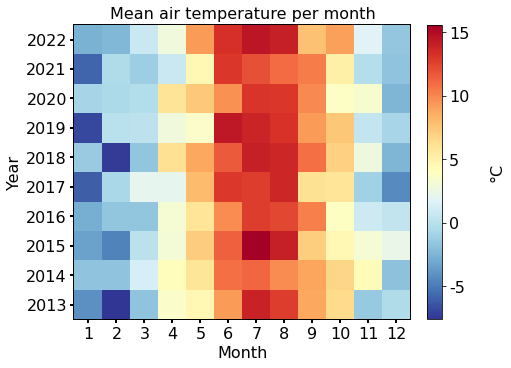

In [4]:
hm = dv.heatmapyearmonth(
    series=series_30min,
    agg='mean',
    title="Mean air temperature per month",
    zlabel="°C",
    cb_digits_after_comma=0,
    figsize=(7, 5)
)
hm.show()

## Get ax in which the plot was generated

In [5]:
this_ax = hm.get_ax()
this_ax

<Axes: title={'center': 'Mean air temperature per month'}, xlabel='Month', ylabel='Year'>

## Get data that was used to create the plot

In [6]:
plot_df = hm.get_plot_data()
plot_df

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2013,-4.127289,-7.613169,-1.802983,3.542244,4.567939,9.312250,13.911503,12.700735,8.835740,6.455432,-1.454567,-0.418102
2014,-1.758389,-1.760185,1.261626,4.103477,5.872437,10.825834,11.193386,9.861532,8.899755,6.744112,4.176977,-1.852366
2015,-3.424022,-4.642639,0.013280,2.999358,7.183376,11.388701,15.575397,14.015612,7.071502,4.600675,3.170463,2.282356
2016,-2.897780,-1.724999,-1.704113,3.230956,5.949297,9.814674,12.694337,12.403714,10.281148,3.805754,0.864235,0.304792
2017,-6.134009,-0.702418,2.126041,2.126046,8.013755,12.940166,12.722626,13.716017,6.102577,5.936708,-1.048244,-4.428223
2018,-1.429528,-7.421057,-1.648860,6.191065,8.871070,11.634234,13.981358,13.754745,10.794253,7.008341,2.641491,-2.511433
2019,-6.910549,-0.084676,0.102886,2.826584,3.579712,14.384816,13.852238,13.148321,9.259018,7.433496,0.375751,-0.786954
2020,-0.855530,-0.612688,-0.341668,5.991480,7.420426,9.644551,13.119326,12.977969,9.930872,3.772030,3.356790,-2.482149
2021,-5.839219,-0.372517,-1.237921,0.637986,4.483079,12.972103,11.986405,11.010687,10.380368,5.082464,-0.202026,-1.779989


</br>

# (2) **Plot monthly maximum** (all parameters) using horizontal layout


Sanitizing timestamp ...
>>> Validating timestamp naming of timestamp column TIMESTAMP_MIDDLE ... Timestamp name OK.
>>> Converting timestamp TIMESTAMP_MIDDLE to datetime ... OK
>>> All rows have timestamp TIMESTAMP_MIDDLE, no rows removed.
>>> Sorting timestamp TIMESTAMP_MIDDLE ascending ...
>>> Removing data records with duplicate indexes ... OK (no duplicates found in timestamp index)
>>> Creating continuous <30 * Minutes> timestamp index for timestamp TIMESTAMP_MIDDLE between 2013-01-01 00:15:00 and 2022-12-31 23:45:00 ...


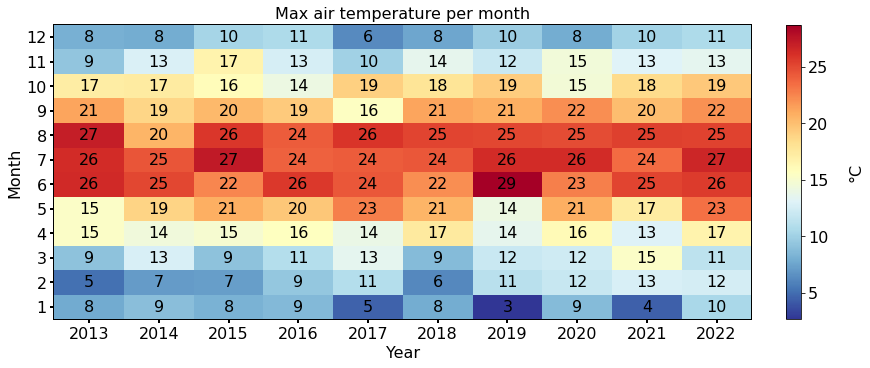

In [7]:
hm = dv.heatmapyearmonth(
    series=series_30min,
    agg='max',
    ranks=False,
    fig=None,
    figsize=(12, 5),
    figdpi=72,
    ax=None,
    ax_orientation='horizontal',
    title="Max air temperature per month",
    # vmin=-5,
    # vmax=25,
    cb_digits_after_comma=0,
    cb_labelsize=16,
    axlabels_fontsize=16,
    ticks_labelsize=16,
    minticks=3,
    maxticks=20,
    cmap='RdYlBu_r',
    color_bad='grey',
    zlabel='°C',
    show_less_xticklabels=False,
    show_values=True,
    show_values_n_dec_places=0,
    verbose=True
)
hm.show()

</br>

# (3) **Plot multiple heatmaps in one figure** (showing measured values)

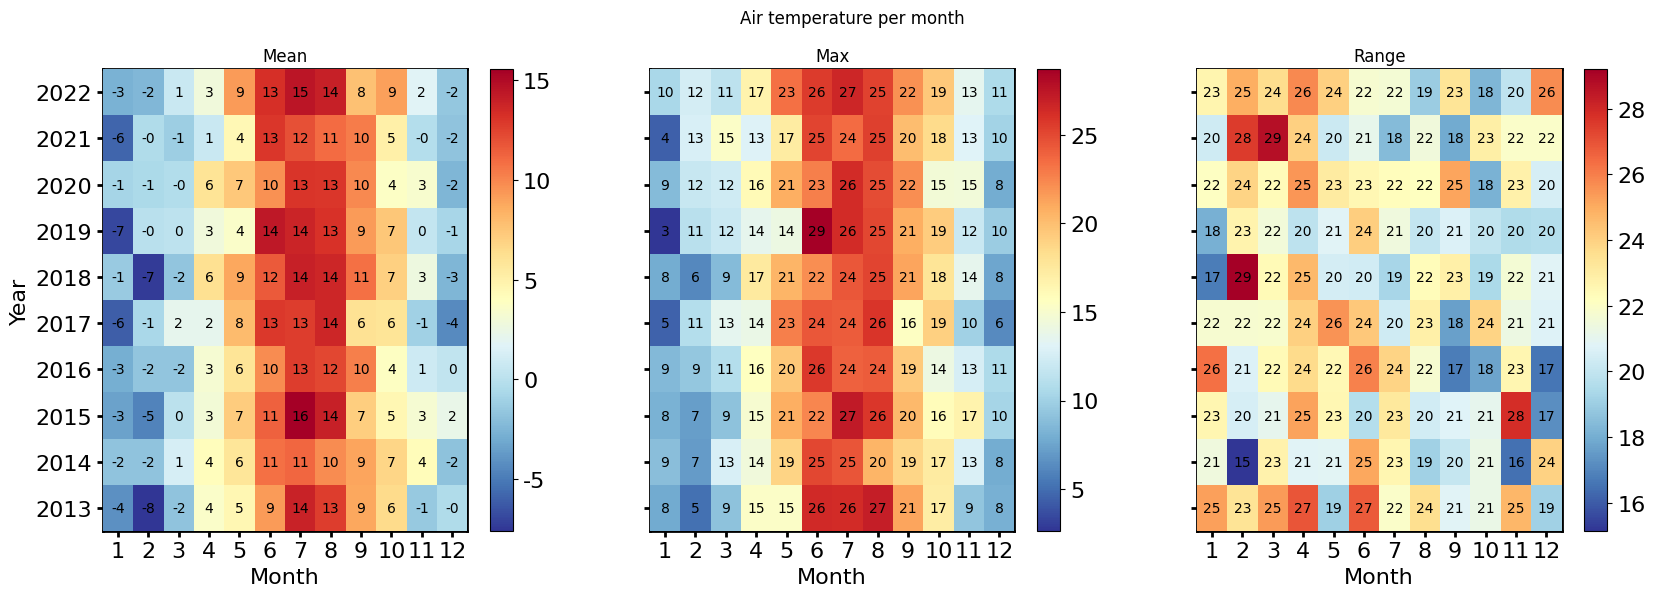

In [8]:
fig = plt.figure(facecolor='white', figsize=(20, 6))
gs = gridspec.GridSpec(1, 3)  # rows, cols
# gs.update(wspace=0.25, hspace=0.3, left=0.03, right=0.97, top=0.9, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_max = fig.add_subplot(gs[0, 1])
ax_range = fig.add_subplot(gs[0, 2])
dv.heatmapyearmonth(ax=ax_mean, series=series_30min, agg='mean', zlabel="", cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()
dv.heatmapyearmonth(ax=ax_max, series=series_30min, agg='max', zlabel="", cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()
dv.heatmapyearmonth(ax=ax_range, series=series_30min, agg=np.ptp, cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()  # np.ptp gives range
ax_mean.set_title("Mean", color='black')
ax_max.set_title("Max", color='black')
ax_range.set_title("Range", color='black')
ax_max.set_ylabel("")
ax_max.set_yticklabels("")
ax_range.set_ylabel("")
ax_range.set_yticklabels("")
fig.suptitle("Air temperature per month")
fig.show()

# (4) **Plot multiple heatmaps in one figure** (showing ranks)

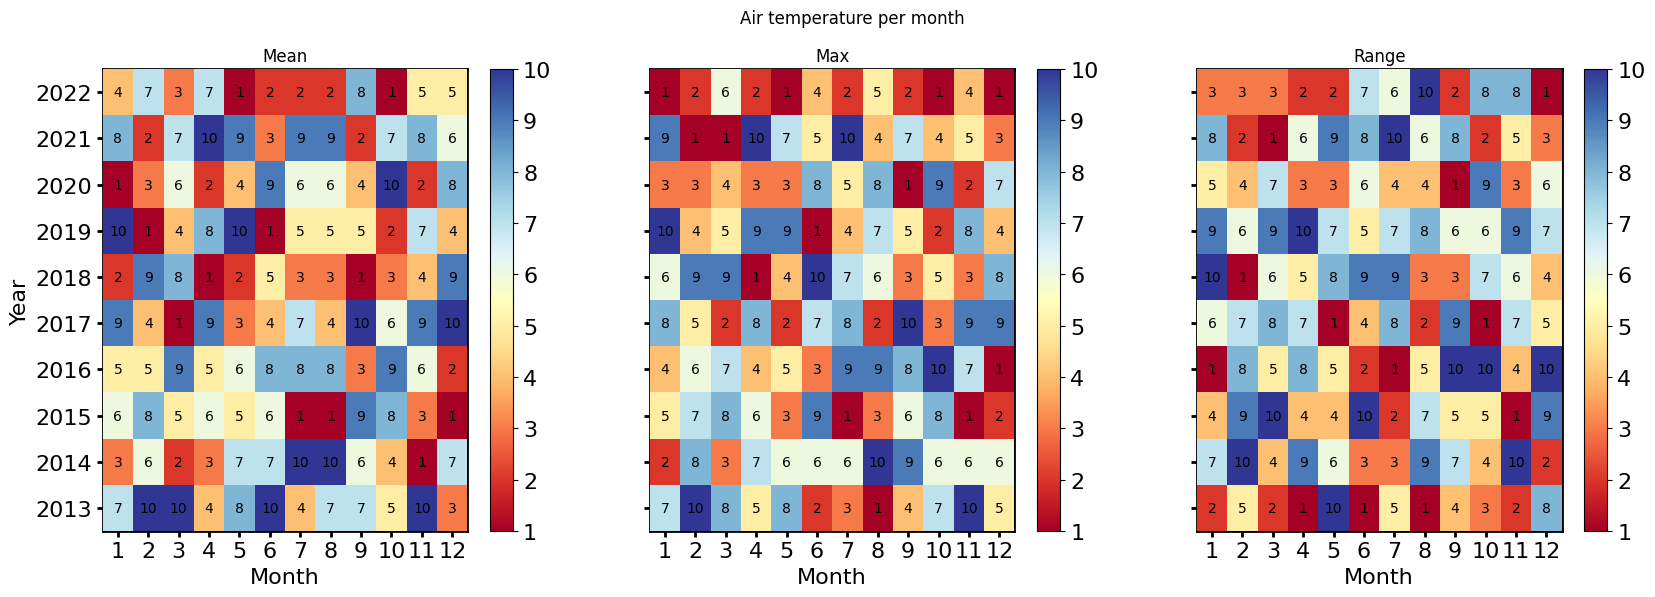

In [9]:
fig = plt.figure(facecolor='white', figsize=(20, 6))
gs = gridspec.GridSpec(1, 3)  # rows, cols
# gs.update(wspace=0.25, hspace=0.3, left=0.03, right=0.97, top=0.9, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_max = fig.add_subplot(gs[0, 1])
ax_range = fig.add_subplot(gs[0, 2])
dv.heatmapyearmonth(ax=ax_mean, series=series_30min, agg='mean', ranks=True, zlabel="", cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()
dv.heatmapyearmonth(ax=ax_max, series=series_30min, agg='max', ranks=True, zlabel="", cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()
dv.heatmapyearmonth(ax=ax_range, series=series_30min, agg=np.ptp, ranks=True, cb_digits_after_comma=0, show_values=True, show_values_fontsize=10).plot()  # np.ptp gives range
ax_mean.set_title("Mean", color='black')
ax_max.set_title("Max", color='black')
ax_range.set_title("Range", color='black')
ax_max.set_ylabel("")
ax_max.set_yticklabels("")
ax_range.set_ylabel("")
ax_range.set_yticklabels("")
fig.suptitle("Air temperature per month")
fig.show()

</br>

# (5) **Plot multiple heatmaps in one figure** (showing ranks) using horizontal orientation

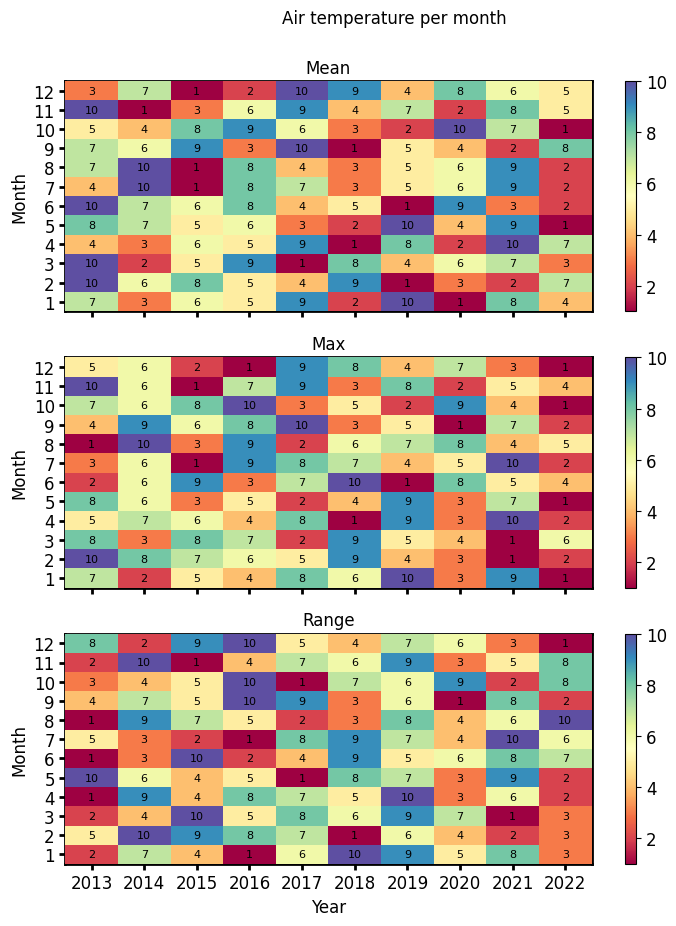

In [10]:
fig = plt.figure(facecolor='white', figsize=(7, 9), dpi=100)
gs = gridspec.GridSpec(3, 1)  # rows, cols
gs.update(wspace=0.25, hspace=0.2, left=0.03, right=0.97, top=0.9, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_max = fig.add_subplot(gs[1, 0])
ax_range = fig.add_subplot(gs[2, 0])
settings = dict(series=series_30min, ranks=True, zlabel="", cb_digits_after_comma=0, show_values=True, ax_orientation='horizontal',
               axlabels_fontsize=12, ticks_labelsize=12, cb_labelsize=12, cmap='Spectral', show_values_fontsize=8)
dv.heatmapyearmonth(ax=ax_mean, agg='mean', **settings).plot()
dv.heatmapyearmonth(ax=ax_max, agg='max', **settings).plot()
dv.heatmapyearmonth(ax=ax_range, agg=np.ptp, **settings).plot()  # np.ptp gives range
ax_mean.set_title("Mean", color='black')
ax_max.set_title("Max", color='black')
ax_range.set_title("Range", color='black')
ax_mean.set_xlabel("")
ax_mean.set_xticklabels("")
ax_max.set_xlabel("")
ax_max.set_xticklabels("")
fig.suptitle("Air temperature per month")
fig.show()

</br>

# **End of notebook**

In [11]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-07-04 23:24:59
